In [10]:
!pip install  -q transformers==4.37.2
!pip install -q bitsandbytes==0.43.0 accelerate==0.25.0
!pip install  git+https://github.com/openai/whisper.git
!pip install -q gradio
!pip install -q gTTS
!pip install -q nltk

  Cloning https://github.com/openai/whisper.git to c:\users\subhranil\appdata\local\temp\pip-req-build-tm_hshg3
  Resolved https://github.com/openai/whisper.git to commit ba3f3cd54b0e5b8ce1ab3de13e32122d0d5f98ab
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git 'C:\Users\Subhranil\AppData\Local\Temp\pip-req-build-tm_hshg3'


In [1]:
import torch
from transformers import BitsAndBytesConfig,pipeline

C:\Users\Subhranil\.conda\envs\personal\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

In [3]:
model_id = "llava-hf/llava-1.5-7b-hf"

In [4]:
Pipe = pipeline(
    "image-to-text",
    model=model_id,
    tokenizer=model_id,
     model_kwargs={"quantization_config": quantization_config})


Loading checkpoint shards: 100%|██████████| 3/3 [00:04<00:00,  1.66s/it]
C:\Users\Subhranil\.conda\envs\personal\lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Subhranil\.cache\huggingface\hub\models--llava-hf--llava-1.5-7b-hf. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Special tokens have bee

In [6]:
import whisper
import gradio as gr
import time
import warnings
import os
from gtts import gTTS
from PIL import Image

In [7]:
Pipe

In [8]:
image_path = "1.jpg"


In [9]:
image = Image.open(image_path)

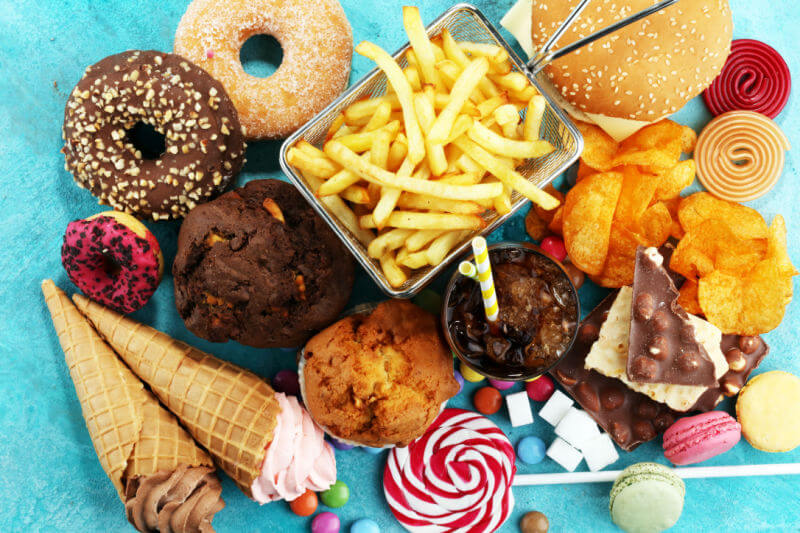

In [10]:
image

In [11]:
import nltk
nltk.download('punkt')
from nltk import sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Subhranil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
max_new_tokens = 300

In [13]:
prompt_instruction ="""
You area helpful AI assistant who has the capability to extract data from the image and you are able to
answer questions about images.You are capable to describe a image as detailed as possible.
What is the image all about?
Now genearte the helpful answer"""

In [14]:
prompt = "User: <image> \n "+ prompt_instruction + "\nAssistant:"

In [15]:
generate_kwargs = {"max_new_tokens": max_new_tokens}

In [16]:
outputs = Pipe(image, prompt=prompt, generate_kwargs=generate_kwargs)

C:\Users\Subhranil\.conda\envs\personal\lib\site-packages\transformers\models\llama\modeling_llama.py:728: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


In [17]:
print(outputs)

[{'generated_text': 'User:   \n \nYou area helpful AI assistant who has the capability to extract data from the image and you are able to\nanswer questions about images.You are capable to describe a image as detailed as possible.\nWhat is the image all about?\nNow genearte the helpful answer\nAssistant: The image is a close-up of a variety of food items, including donuts, french fries, and other snacks. The food is displayed on a table, and there are multiple donuts and fries spread out across the table. The close-up view of the food items showcases the different types of food available.'}]


In [18]:
for sent in sent_tokenize(outputs[0]["generated_text"]):
    print(sent)

User:   
 
You area helpful AI assistant who has the capability to extract data from the image and you are able to
answer questions about images.You are capable to describe a image as detailed as possible.
What is the image all about?
Now genearte the helpful answer
Assistant: The image is a close-up of a variety of food items, including donuts, french fries, and other snacks.
The food is displayed on a table, and there are multiple donuts and fries spread out across the table.
The close-up view of the food items showcases the different types of food available.


In [19]:
warnings.filterwarnings("ignore")

In [20]:
import numpy as np

In [21]:
torch.cuda.is_available()

True

In [22]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [23]:
print(f"Using torch {torch.__version__} ({DEVICE})")

Using torch 2.2.2+cu118 (cuda)


In [24]:
import whisper

In [25]:
model = whisper.load_model("medium",device=DEVICE)

100%|█████████████████████████████████████| 1.42G/1.42G [05:03<00:00, 5.04MiB/s]


In [27]:
import re
import datetime

In [28]:
##Logger file
tstamp = datetime.datetime.now()
tstamp = str(tstamp).replace(" ","_")
logile = f"log_{tstamp}.txt"

In [29]:
def writehistory(text):
    with open(logfile, 'a', encoding='utf-8') as f:
        f.write(text)
        f.write('\n')
    f.close()
     

In [30]:
import requests

In [54]:
def img2txt(input_text, input_image):

    # load the image
    image = Image.open(input_image)

    writehistory(f"Input text: {input_text} - Type: {type(input_text)} - Dir: {dir(input_text)}")
    if type(input_text) == tuple:
        prompt_instructions = """
        You are helpful AI assistant who has the capability to extract data from the image and you are able to
        answer questions about images.You are capable to describe a image as detailed as possible.
        What is the image all about?
        Now genearte the helpful answer"""
    else:
        prompt_instructions = "You are an expert in imagery descriptive analysis. "
        "Using as much detail as possible from the image, respond to the following prompt: " + input_text

    writehistory(f"prompt_instructions: {prompt_instructions}")
    prompt = "User: <image> \n "+ prompt_instruction + "\nAssistant:"

    outputs = Pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 250})

    if outputs is not None and len(outputs[0]["generated_text"])>0:
        match = re.search(r'ASSISTANT:\s*(.*)',outputs[0]["generated_text"])
        if match:
            reply = match.group(1)
        else:
            reply = "No response found"
    else:
        reply="No response generated"
    
    return reply

SyntaxError: 'return' outside function (1896721494.py, line 10)